In [7]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import hist
from hist import Hist
import mplhep as hep
import math
import scipy
from scipy.signal import peak_widths

genkt = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_z_xsec_qq_genkt.root")
kt = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_z_xsec_qq_kt.root")
valencia = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_z_xsec_qq_valencia.root")

Text(0.0, 1.0, 'FCC-ee simulation')

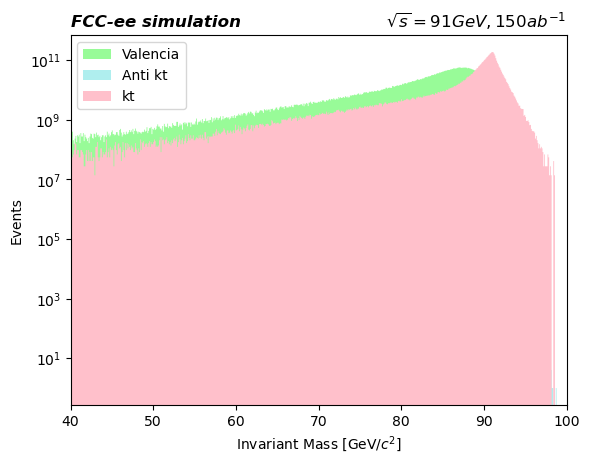

In [8]:
genkt_mass = genkt['wzp6_ee_qq_ecm91p2/mass_inv;1'].to_hist()
kt_mass = kt['wzp6_ee_qq_ecm91p2/mass_inv;1'].to_hist()
valencia_mass = valencia['wzp6_ee_qq_ecm91p2/mass_inv;1'].to_hist()

hep.histplot([valencia_mass,genkt_mass,kt_mass], label = ["Valencia", "Anti kt", "kt"], 
             histtype = "fill", color = ["palegreen","paleturquoise","pink"])
plt.legend(loc = "upper left")
plt.yscale("log")
plt.xlim(40,100)
plt.xlabel(r"Invariant Mass [GeV/$c^{2}$]")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("images/hardrons_inv_mass.png")

ValueError: Plotting multiple histograms with different binning is not supported

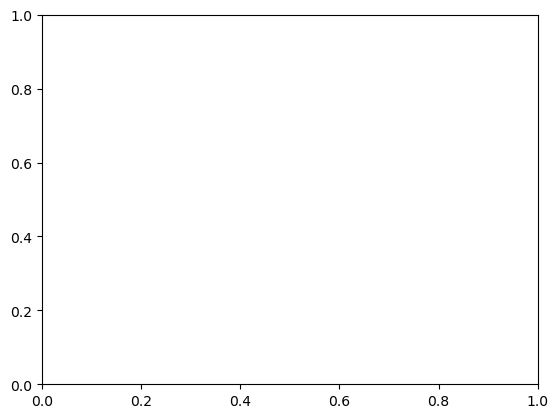

In [24]:
genkt_e = genkt['wzp6_ee_qq_ecm91p2/mass_inv;1'].to_hist()
genkt_ye,genkt_xe = genkt_e.to_numpy()
genkt_xnew = genkt_e.axes[0].edges/91.118
genkt_e_new = Hist(hist.axis.Variable(genkt_xnew))
genkt_e_new[:] = genkt_ye

kt_e = kt['wzp6_ee_qq_ecm91p2/sum_e;1'].to_hist()
kt_ye,kt_xe = kt_e.to_numpy()
kt_xnew = kt_e.axes[0].edges/91.118
kt_e_new = Hist(hist.axis.Variable(kt_xnew))
kt_e_new[:] = kt_ye

valencia_e = valencia['wzp6_ee_qq_ecm91p2/sum_e;1'].to_hist()
valencia_ye,valencia_xe = valencia_e.to_numpy()
valencia_xnew = valencia_e.axes[0].edges/91.118
valencia_e_new = Hist(hist.axis.Variable(valencia_xnew))
valencia_e_new[:] = valencia_ye

RP_e = genkt['wzp6_ee_qq_ecm91p2/sum_energy'].to_hist()
RP_ye,RP_xe = RP_e.to_numpy()
RP_xnew = RP_e.axes[0].edges/91.118
RP_e_new = Hist(hist.axis.Variable(RP_xnew))
RP_e_new[:] = RP_ye

hep.histplot([valencia_e_new,genkt_e_new,kt_e_new,RP_e_new], 
             label = ["Valencia","Anti kt", "kt", "Reconstructed Particles"],
            color = ["paleturquoise", "palegreen", "peachpuff", "pink"], 
             )
plt.yscale("log")
plt.legend(loc = "upper left")
plt.xlim(0,1.1)
plt.xlabel("Normalized Energy")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("images/hardrons_norm_e.png")

In [25]:
genkt_max = max(genkt_ye)
genkt_index = np.argmax(genkt_ye)
genkt_peak = genkt_xnew[genkt_index]
print("Anti kt peak = ", genkt_peak)

genkt_half_max = genkt_max/2
genkt_sides_index = np.argwhere(abs(genkt_ye - genkt_half_max) < 7000000000)
genkt_sides = genkt_xnew[genkt_sides_index]
#print(genkt_sides_index, genkt_sides)
genkt_jer = genkt_sides[2] - genkt_sides[0]
print("Anti kt JER = ", genkt_jer[0])

Anti kt peak =  0.998704975965232
Anti kt JER =  0.002194955991132378


In [26]:
kt_max = max(kt_ye)
kt_index = np.argmax(kt_ye)
kt_peak = kt_xnew[kt_index]
print("kt peak = ", kt_peak)

kt_half_max = kt_max/2
kt_sides_index = np.argwhere(abs(kt_ye - kt_half_max) < 7000000000)
kt_sides = kt_xnew[kt_sides_index]
#print(kt_sides_index, kt_sides)
kt_jer = kt_sides[2] - kt_sides[0]
print("kt JER = ", kt_jer[0])

kt peak =  0.998704975965232


IndexError: index 2 is out of bounds for axis 0 with size 0

In [27]:
valencia_max = max(valencia_ye)
valencia_index = np.argmax(valencia_ye)
valencia_peak = valencia_xnew[valencia_index]
print("Valencia peak = ", valencia_peak)

valencia_half_max = valencia_max/2
valencia_sides_index = np.argwhere(abs(valencia_ye - valencia_half_max) < 400000000)
valencia_sides = valencia_xnew[valencia_sides_index]
#print(valencia_sides_index, valencia_sides)
valencia_jer = valencia_sides[1] - valencia_sides[0]
print("Valencia JER = ", valencia_jer[0])

Valencia peak =  0.9548058561425844


IndexError: index 1 is out of bounds for axis 0 with size 0

In [28]:
def mean(x,y):

    numerator = 0
    denominator = sum(y)

    for i in range(0,len(x)-1):
        numerator += x[i]*y[i]
    
    mean = numerator/denominator
    num2 = 0

    for i in range(0,len(x)-1):
        num2 += (x[i]-mean)**2

    std = np.sqrt(num2/(denominator-1))
    return(mean, std)

In [29]:
genkt_jes = mean(genkt_xnew,genkt_ye)[0]
kt_jes = mean(kt_xnew,kt_ye)[0]
valencia_jes = mean(valencia_xnew,valencia_ye)[0]

print("Anti kt JES = ", genkt_jes)
print("kt JES = ", kt_jes)
print("Valencia JES = ", valencia_jes)

Anti kt JES =  0.9713602865969408
kt JES =  0.9721511280228743
Valencia JES =  0.9063655012561038


Text(0.0, 1.0, 'FCC-ee simulation')

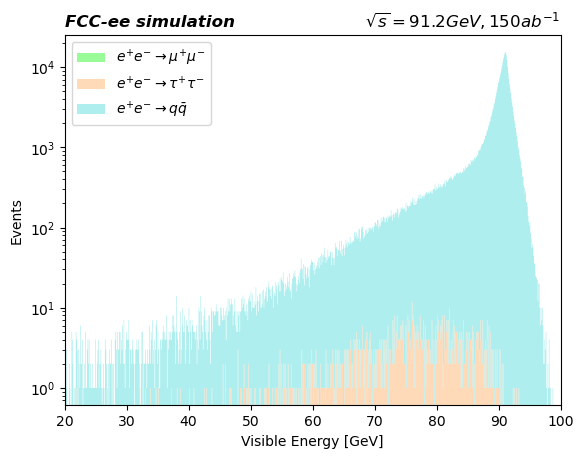

In [35]:
genkt_e = (genkt['wzp6_ee_qq_ecm91p2/mass_inv;1'].to_hist())*
genkt_tau_e = genkt['wzp6_ee_tautau_ecm91p2/mass_inv;1'].to_hist()
genkt_mu_e = genkt['wzp6_ee_mumu_ecm91p2/mass_inv;1'].to_hist()

hep.histplot([ genkt_mu_e, genkt_tau_e, genkt_e],stack = True, 
             label = [r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$",
                      r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$",r"$e^{+} e^{-} \rightarrow q \bar{q}$"], 
             color = ["palegreen", "peachpuff", "paleturquoise"], 
             histtype = "fill")
plt.legend(loc = "upper left")
plt.yscale("log")
plt.xlabel("Visible Energy [GeV]")
plt.ylabel("Events")
plt.xlim(20,100)
plt.title(r"$\sqrt{s} = 91.2 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("images/hardrons_tau_e.png")

Text(0.0, 1.0, 'FCC-ee simulation')

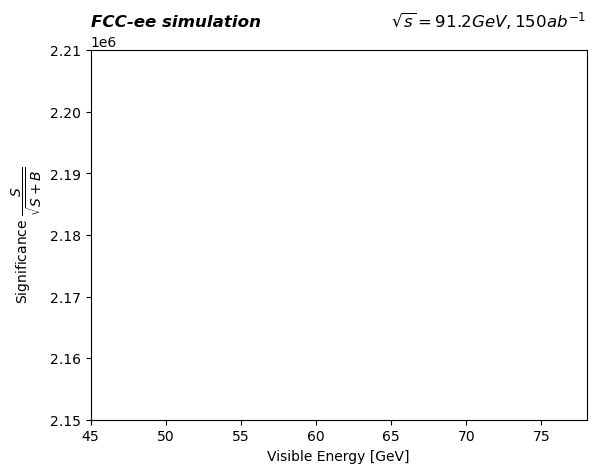

In [31]:
genkt_tau_e_x = genkt_tau_e.axes[0].centers
genkt_tau_e_y = genkt_tau_e.values()

genkt_mu_e_x = genkt_mu_e.axes[0].centers
genkt_mu_e_y = genkt_mu_e.values()

genkt_e_ynew = []

for i in genkt_xe:
    s = genkt_e[i*1.0j:].sum()
    b = genkt_tau_e[i*1.0j:].sum() + genkt_mu_e[i*1.0j:].sum()
    if s.value+b.value < 0.0000000001:
        genkt_e_ynew.append(0)
    else:
        ratio = s.value/math.sqrt(s.value+b.value)
        genkt_e_ynew.append(ratio)

plt.stackplot(genkt_xe,genkt_e_ynew, color = "gold")
plt.ylim(2.15e6,2.21e6)
plt.xlim(45,78)
plt.xlabel("Visible Energy [GeV]")
plt.ylabel(r"Significance $\dfrac{S}{\sqrt{S+B}}$")
plt.title(r"$\sqrt{s} = 91.2 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("images/hardrons_tau_cut_e.png")

In [32]:
genkt_e_sig = max(genkt_e_ynew)
genkt_e_index = np.argmax(genkt_e_ynew)
genkt_e_cut = genkt_xe[genkt_e_index]

print(genkt_e_sig)
print(genkt_e_cut)

611.1465401226168
0.0


(0.0, 125.0)

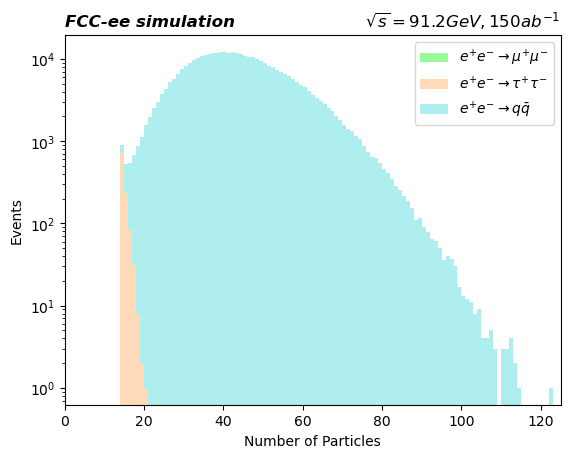

In [33]:
genkt_tau_no = genkt['wzp6_ee_tautau_ecm91p2/RP_no;1'].to_hist()
genkt_mu_no = genkt['wzp6_ee_mumu_ecm91p2/RP_no;1'].to_hist()
genkt_no = genkt['wzp6_ee_qq_ecm91p2/RP_no;1'].to_hist()
hep.histplot([genkt_mu_no, genkt_tau_no, genkt_no],stack = True, 
             label = [r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$",
                      r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$",r"$e^{+} e^{-} \rightarrow q \bar{q}$"], 
             color = ["palegreen", "peachpuff", "paleturquoise"], 
             histtype = "fill")
plt.legend(loc = "upper right")
plt.yscale("log")
plt.xlabel("Number of Particles")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
plt.xlim(0,125)
#plt.savefig("images/hardrons_tau_no.png")

Text(0.0, 1.0, 'FCC-ee simulation')

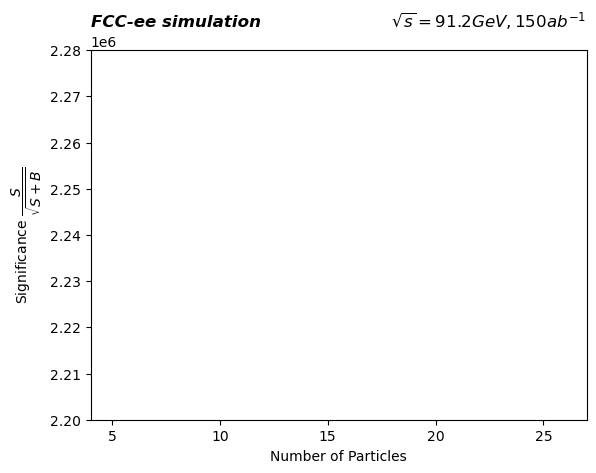

In [34]:
genkt_no_x = genkt_no.axes[0].centers
genkt_no_y = genkt_no.values()

genkt_tau_no_x = genkt_tau_no.axes[0].centers
genkt_tau_no_y = genkt_tau_no.values()

genkt_muu_no_x = genkt_mu_no.axes[0].centers
genkt_muu_no_y = genkt_mu_no.values()

genkt_no_ynew = []

for i in genkt_no_x:
    s = genkt_no[i*1.0j:].sum()
    b = genkt_tau_no[i*1.0j:].sum()+genkt_mu_no[i*1.0j:].sum()
    if s.value+b.value < 0.0000000001:
        genkt_no_ynew.append(0)
    else:
        ratio = s.value/math.sqrt(s.value+b.value)
        genkt_no_ynew.append(ratio)

plt.stackplot(genkt_no_x,genkt_no_ynew, color = "gold")
plt.ylim(2.2e6,2.28e6)
plt.xlim(4,27)
plt.xlabel("Number of Particles")
plt.ylabel(r"Significance $\dfrac{S}{\sqrt{S+B}}$")
plt.title(r"$\sqrt{s} = 91.2 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("images/hardrons_tau_cut_no.png")

In [20]:
genkt_no_sig = max(genkt_no_ynew)
genkt_no_index = np.argmax(genkt_no_ynew)
genkt_no_cut = genkt_no_x[genkt_no_index]

print(genkt_no_sig)
print(genkt_no_cut)

611.5826597257786
15.5


Text(0.0, 1.0, 'FCC-ee simulation')

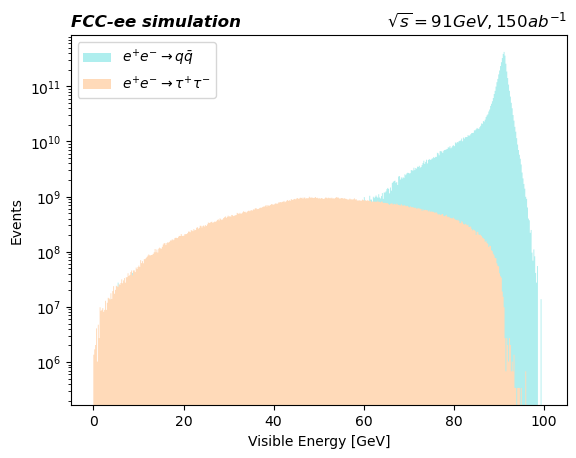

In [21]:
kt_tau_e = kt['wzp6_ee_tautau_ecm91p2/sum_e;1'].to_hist()

hep.histplot([ kt_e, kt_tau_e], 
             label = [r"$e^{+} e^{-} \rightarrow q \bar{q}$",r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$"], 
             color = ["paleturquoise","peachpuff"], histtype = "fill")
plt.legend(loc = "upper left")
plt.yscale("log")
plt.xlabel("Visible Energy [GeV]")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("images/hardrons_tau_e.png")

Text(0.0, 1.0, 'FCC-ee simulation')

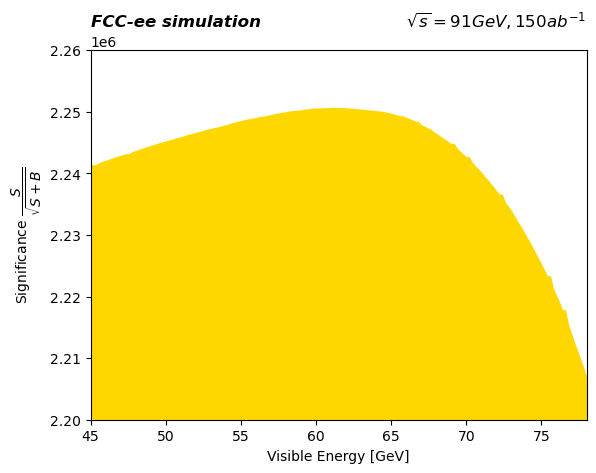

In [22]:
kt_tau_e_x = kt_tau_e.axes[0].centers
kt_tau_e_y = kt_tau_e.values()

kt_e_ynew = []

for i in kt_xe:
    s = kt_e[i*1.0j:].sum()
    b = kt_tau_e[i*1.0j:].sum()
    if s.value+b.value < 0.0000000001:
        kt_e_ynew.append(0)
    else:
        ratio = s.value/math.sqrt(s.value+b.value)
        kt_e_ynew.append(ratio)

plt.stackplot(kt_xe,kt_e_ynew, color = "gold")
plt.ylim(2.2e6,2.26e6)
plt.xlim(45,78)
plt.xlabel("Visible Energy [GeV]")
plt.ylabel(r"Significance $\dfrac{S}{\sqrt{S+B}}$")
plt.title(r"$\sqrt{s} = 91 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("images/hardrons_tau_cut_e.png")

In [23]:
kt_e_sig = max(kt_e_ynew)
kt_e_index = np.argmax(kt_e_ynew)
kt_e_cut = kt_xe[kt_e_index]

print(kt_e_sig)
print(kt_e_cut)

2250544.186735939
61.199999999999996


Text(0.0, 1.0, 'FCC-ee simulation')

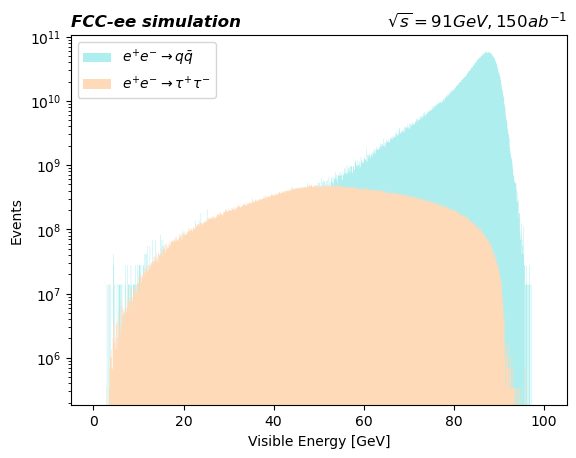

In [114]:
valencia_tau_e = valencia['wzp6_ee_tautau_ecm91p2/sum_e;1'].to_hist()

hep.histplot([ valencia_e, valencia_tau_e], 
             label = [r"$e^{+} e^{-} \rightarrow q \bar{q}$",r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$"], 
             color = ["paleturquoise","peachpuff"], histtype = "fill")
plt.legend(loc = "upper left")
plt.yscale("log")
plt.xlabel("Visible Energy [GeV]")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("images/hardrons_tau_e.png")

Text(0.0, 1.0, 'FCC-ee simulation')

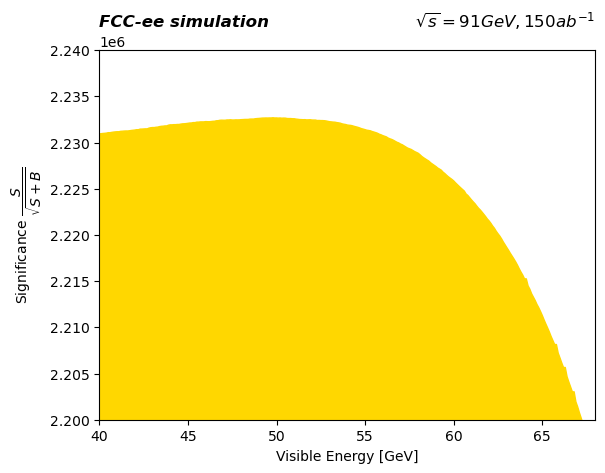

In [125]:
valencia_tau_e_x = valencia_tau_e.axes[0].centers
valencia_tau_e_y = valencia_tau_e.values()

valencia_e_ynew = []

for i in valencia_xe:
    s = valencia_e[i*1.0j:].sum()
    b = valencia_tau_e[i*1.0j:].sum()
    if s.value+b.value < 0.0000000001:
        valencia_e_ynew.append(0)
    else:
        ratio = s.value/math.sqrt(s.value+b.value)
        valencia_e_ynew.append(ratio)

plt.stackplot(valencia_xe,valencia_e_ynew, color = "gold")
plt.ylim(2.2e6,2.24e6)
plt.xlim(40,68)
plt.xlabel("Visible Energy [GeV]")
plt.ylabel(r"Significance $\dfrac{S}{\sqrt{S+B}}$")
plt.title(r"$\sqrt{s} = 91 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("images/hardrons_tau_cut_e.png")

In [126]:
valencia_e_sig = max(valencia_e_ynew)
valencia_e_index = np.argmax(valencia_e_ynew)
valencia_e_cut = valencia_xe[valencia_e_index]

print(valencia_e_sig)
print(valencia_e_cut)

2232679.7233664733
49.8


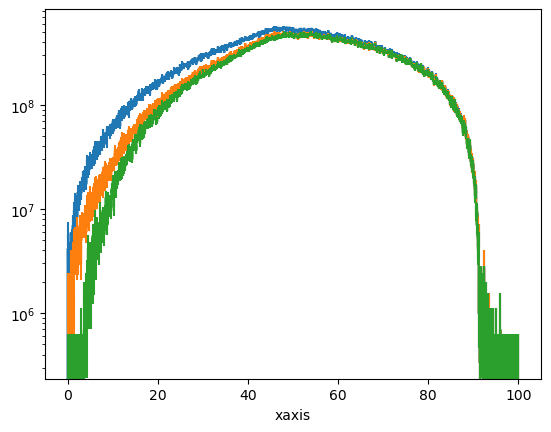

In [127]:
hep.histplot([genkt_tau_e,kt_tau_e,valencia_tau_e])
plt.yscale("log")